In [ ]:
#general imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xgboost
from sklearn.preprocessing import StandardScaler
%matplotlib inline 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, recall_score, f1_score
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly import tools
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from keras.models import Sequential
from keras.layers import Dense

import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

# Project description:
Each of the V features are principal components obtained with PCA
without counting the two features: 'Time' and 'Amount'
* 'Time':seconds elapsed between each transaction and the first transaction in the dataset
* 'Amount': transaction amount

The Class response variable:
* ‘1’ : in case of fraud and 
* ‘0’ : Not fraud

### Assumptions:
* duplicate rows reflect reality and have value (i.e. duplicates are not dropped), and that the dataset is weighted correctly and we do not need to normalize the data.

In [ ]:
def metrics(actuals, predictions):
    """
    a function to format and output metrics reflecting how good the ML models are when using various techniques
    """
    print("Accuracy: {:.5f}".format(accuracy_score(actuals, predictions)))
    print("Precision: {:.5f}".format(precision_score(actuals, predictions)))
    print("Recall: {:.5f}".format(recall_score(actuals, predictions)))
    print("F1-score: {:.5f}".format(f1_score(actuals, predictions)))

# Loading in the data

In [ ]:
data = pd.read_csv('Creditcard.csv')
#note: you need to download the data and put it in this working directory. the gitignore file is set to not push this dataset. 
# data can be found here: https://drive.google.com/file/d/1yDluWXKfBtQvDm3aJ_1ML701EXoBCu77/view?usp=sharing

# Preliminary data exploration and minor analysis:

In [ ]:
#looking at the columns in the dataset  and the dataset's shape, previewing the heead of the dataframe
print("Shape of data: ", data.shape)
print(data.columns)
data.head()

In [ ]:
#looking at the information reguarding completeness of the data:
print(data.isnull().values.any())
data.info()

In [ ]:
#looking at descriptive stats for the dataset:
data.describe().transpose()

In [ ]:
#checking for the class categorization value counts:
data['Class'].value_counts()

In [ ]:
# determine the number of fraud cases
fraud_df = data[data['Class'] == 1]
not_fraud_df = data[data['Class'] == 0]
fraud_percentage = (len(fraud_df)/(len(fraud_df)+len(not_fraud_df)))*100

print('Fraud Cases: {}'.format(len(fraud_df)))
print('Valid Cases: {}'.format(len(not_fraud_df)))
print('Fraud Percentage: {}'.format(fraud_percentage))

# Data Visualization

In [ ]:
#Z axis will be V1
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')

#Fraud
x=fraud_df['Time']
y=fraud_df['V1']
z=fraud_df["Amount"]
ax.scatter(x, y, z, c='coral',label='Fraud')
#Not Fraud
x=not_fraud_df['Time']
y=not_fraud_df['V1']
z=not_fraud_df["Amount"]
ax.scatter(x, y, z, c='lightblue', label='Not Fraud')
#adding some details on the plot
ax.set_title("Initial look")
ax.set_xlabel("Time")
ax.set_ylabel("V1")
ax.set_zlabel("Amount")
plt.legend()
plt.show()

# Test Train Split:

In [ ]:
# naming the dependent "y" variable the class output
y_variable = data["Class"]
# naming the "x" independent variable all of the other data
x_variable = data.drop(["Class"], axis= 1)

In [ ]:
(train_X, test_X, train_Y, test_Y) = train_test_split(x_variable, y_variable, test_size= 0.3, random_state= 42)
print("Shape of train_X: ", train_X.shape)
print("Shape of test_X: ", test_X.shape)

# Training the models

## Decision Tree

In [ ]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(train_X, train_Y)
predictions_dt = decision_tree.predict(test_X)
decision_tree_score = decision_tree.score(test_X, test_Y) * 100
print("Decision Tree Score: ", decision_tree_score)

In [ ]:
confusion_matrix_dt = confusion_matrix(test_Y, predictions_dt.round())
print("Confusion Matrix - Decision Tree")
print(confusion_matrix_dt)

In [ ]:
print("Evaluation of Decision Tree Model")
print()
metrics(test_Y, predictions_dt.round())

## Random Forest

In [ ]:
# Random Forest
random_forest = RandomForestClassifier(n_estimators= 100)
random_forest.fit(train_X, train_Y)
predictions_rf = random_forest.predict(test_X)
random_forest_score = random_forest.score(test_X, test_Y) * 100
print("Random Forest Score: ", random_forest_score)

In [ ]:
confusion_matrix_rf = confusion_matrix(test_Y, predictions_rf.round())
print("Confusion Matrix - Random Forest")
print(confusion_matrix_rf)

In [ ]:
print("Evaluation of Random Forest Model:")
metrics(test_Y, predictions_rf.round())

## Logistic Regression

In [ ]:
lr = LogisticRegression(solver="lbfgs")
lr.fit(train_X, train_Y)
predictions_Log = lr.predict(test_X)

In [ ]:
confusion_matrix_kNN = confusion_matrix(test_Y, predictions_Log.round())
print("Confusion Matrix - Logistic Regression")
print(confusion_matrix_kNN)

In [ ]:
print("Evaluation of Logistic Regression Model")
print()
metrics(test_Y, predictions_Log.round())

## XGBoost 

In [ ]:
xgb = XGBClassifier(max_depth = 4)
xgb.fit(train_X, train_Y)
predictions_XGBoost = xgb.predict(test_X)

In [ ]:
confusion_matrix_XGBoost = confusion_matrix(test_Y, predictions_XGBoost.round())
print("Confusion Matrix - XGBoost")
print(confusion_matrix_XGBoost)

In [ ]:
print("Evaluation of XGBoost Model")
print()
metrics(test_Y, predictions_XGBoost.round())

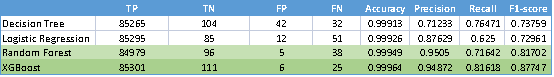

XGBoost Performed best compare to other algorithms for provided data set. Due to performance issues we didn't consider KNN and SVM. Now lets try with ANN

## Nueral Network - with time included in the dataset

In [ ]:
# Initializing the ANN
model = Sequential()

Creating a simple NN with following parameters::

fully-connected layers: 5

Activation: ReLu

Input Vector Lenght: 30

Output Activation Function: Sigmoid to classify result as non-fraud (0) or fraud (1)

a dropout step is included to prevent overfitting.

In [ ]:
# Adding the input layer and first Hidden Layer
model.add(Dense(activation = "relu", input_dim = 30, units = 6, kernel_initializer='uniform' ))

# Adding the Second hidden layer
model.add(Dense(activation = "relu", units =20, kernel_initializer='uniform'))

##add Dropout(0.5) here to prevent overfitting::: wip- Amit

# Adding the third hidden layer
model.add(Dense(activation = "relu", units = 10, kernel_initializer='uniform'))

# Addinng the output Layer
model.add(Dense(activation = 'sigmoid', units =1, kernel_initializer='uniform',))

In [ ]:
model.summary()

In [ ]:
# compiling the ANN
model.compile(optimizer='adam', loss= 'binary_crossentropy', metrics= ['accuracy'])

In [ ]:
# Fitting the ANN to the training set
model.fit(train_X, train_Y, batch_size = 100, epochs =10)

In [ ]:
# Making the Prediction and Evaluating the model
# Predicting the Test set result
y_pred = model.predict(test_X)
y_pred = (y_pred>0.5)

In [ ]:
confusion_matrix_XGBoost = confusion_matrix(test_Y, y_pred.round())
print("Confusion Matrix - ANN")
print(confusion_matrix_XGBoost)

In [ ]:
print("Evaluation of ANN Model")
print()
metrics(test_Y, y_pred.round())

## Nueral network without time included

Creating a simple NN with following parameters::

fully-connected layers: 5

Activation: ReLu

Input Vector Lenght: 29

Output Activation Function: Sigmoid to classify result as non-fraud (0) or fraud (1)

a dropout step is included to prevent overfitting.

In [ ]:
print(train_X.shape)
train_X_2 = train_X.drop(columns='Time')
print(train_X_2.shape)
train_X_2.head(2)

In [ ]:
print(test_X.shape)
test_X_2 = test_X.drop(columns='Time')
print(test_X_2.shape)
test_X_2.head(2)

In [ ]:
# Initializing the ANN
model = Sequential()

In [ ]:
# Adding the input layer and first Hidden Layer
model.add(Dense(activation = "relu", input_dim = 29, units = 6, kernel_initializer='uniform' ))

# Adding the Second hidden layer
model.add(Dense(activation = "relu", units =20, kernel_initializer='uniform'))

##add Dropout(0.5) here to prevent overfitting::: wip- Amit

# Adding the third hidden layer
model.add(Dense(activation = "relu", units = 10, kernel_initializer='uniform'))

# Addinng the output Layer
model.add(Dense(activation = 'sigmoid', units =1, kernel_initializer='uniform',))

In [ ]:
model.summary()

In [ ]:
# compiling the ANN
model.compile(optimizer='adam', loss= 'binary_crossentropy', metrics= ['accuracy'])

In [ ]:
# Fitting the ANN to the training set
model.fit(train_X_2, train_Y, batch_size = 100, epochs =10)

In [ ]:
# Making the Prediction and Evaluating the model
# Predicting the Test set result
y_pred = model.predict(test_X_2)
y_pred = (y_pred>0.5)

In [ ]:
confusion_matrix_XGBoost = confusion_matrix(test_Y, y_pred.round())
print("Confusion Matrix - ANN")
print(confusion_matrix_XGBoost)

In [ ]:
print("Evaluation of ANN Model")
print()
metrics(test_Y, y_pred.round())

Curiusly, this model works better without including the data related to time.